# Active Learning experiment on MNIST




In [1]:
%load_ext autoreload

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [4]:
sys.path.append(MODULES_PATH)
sys.path.append(os.path.join(BASE_PATH, "tf_al"))

In [5]:
from tf_al import ExperimentSuitMetrics
from utils import MetricsTransformer, Frame, ExperimentFrame

In [6]:
dtypes = {
    "run": int,
    "iteration": int,
    "train_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "query_time": float,
    "labeled_pool_size": int,
    "unlabeled_pool_size": int,
    "method": str
}

# MC Dropout

In [7]:
def plot_seed_runs(experiment_frames):
    
    seed_keys = list(experiment_frames.keys())
    print(seed_keys)
    num_seed_runs = len(seed_keys)
    
    fig, ax = plt.subplots(num_seed_runs, 3, figsize=(20, 10))
    
    for i in range(num_seed_runs):
        seed = seed_keys[i]
        df = experiment_frames[seed]
        
        sns.lineplot(ax=ax[i][0], data=df, x="labeled_pool_size", y="eval_accuracy", hue="method")
        ax[i][0].set_xlabel("Pool Size")
        ax[i][0].set_ylabel("Eval. Accuracy")
    
        sns.lineplot(ax=ax[i][1], data=df, x="labeled_pool_size", y="eval_loss", hue="method")
        ax[i][1].set_xlabel("Pool Size")
        ax[i][1].set_ylabel("Eval. Loss")
        ax[i][1].set_title("Seed(={})".format(seed))

        sns.lineplot(ax=ax[i][2], data=df, x="labeled_pool_size", y="query_time", hue="method")
        ax[i][2].set_xlabel("Pool Size")
        ax[i][2].set_ylabel("Eval. Accuracy")
        
    plt.tight_layout(pad=2)

In [8]:
base_experiment_path = os.path.join(METRICS_PATH, "mnist")
metrics_handler = ExperimentSuitMetrics(base_experiment_path)
mc_df = MetricsTransformer.load_from_dir(metrics_handler, "mc_dropout", dtype=dtypes)

In [9]:
%autoreload 2
from utils import ExperimentFrame
res = ExperimentFrame(mc_df)
processed_frame = res.get_frame()

In [10]:
"model" in mc_df

True

In [11]:
%autoreload 2
df_mc_method = Frame.split_by(mc_df, "method")
df_mc_mean = Frame.mean(df_mc_method, "iteration", ["method", "model"])
df_mc_mean[0].head()

,method,model,run,train_time,query_time,eval_loss,eval_accuracy,labeled_pool_size,unlabeled_pool_size
iteration,,,,,,,,,
1,BALD,MC Dropout,4,2.190351,17.176010,1.720373,0.528889,20,59870
2,BALD,MC Dropout,4,2.896022,17.159826,1.497197,0.577600,30,59860
3,BALD,MC Dropout,4,3.551120,17.228280,1.477393,0.589200,40,59850
4,BALD,MC Dropout,4,4.199586,17.253509,1.233238,0.639956,50,59840
5,BALD,MC Dropout,4,4.910980,17.204824,1.066337,0.682178,60,59830


In [12]:
from tf_al.score import leff

In [13]:
baseline_acc = df_mc_mean[4]["eval_accuracy"].to_numpy()
bald_acc = df_mc_mean[0]["eval_accuracy"].to_numpy()

In [14]:
df_mc_mean[2].head()

,method,model,run,train_time,query_time,eval_loss,eval_accuracy,labeled_pool_size,unlabeled_pool_size
iteration,,,,,,,,,
1,Max. Var. Ratio,MC Dropout,4,2.176331,17.067586,1.720024,0.528933,20,59870
2,Max. Var. Ratio,MC Dropout,4,2.889261,17.057717,1.466966,0.588489,30,59860
3,Max. Var. Ratio,MC Dropout,4,3.563071,17.062053,1.314025,0.612622,40,59850
4,Max. Var. Ratio,MC Dropout,4,4.261497,17.211113,1.119199,0.663422,50,59840
5,Max. Var. Ratio,MC Dropout,4,4.893893,16.980116,1.096661,0.675067,60,59830


<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

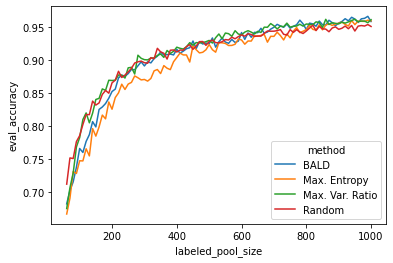

In [15]:
result = leff(bald_acc, baseline_acc)

merged_frames = pd.concat([df_mc_mean[0], df_mc_mean[1], df_mc_mean[2], df_mc_mean[4]])
selector = merged_frames["labeled_pool_size"]>50
sns.lineplot(data=merged_frames[selector], x="labeled_pool_size", y="eval_accuracy", hue="method")

In [16]:
baseline_leff = leff(baseline_acc, baseline_acc)

In [ ]:
mean_frames = Frame.mean(df_mc_method, "iteration")

In [ ]:
sns.lineplot(data=df_mc_method[0].groupby("iteration").mean(), x="labeled_pool_size", y="eval_accuracy")

In [ ]:
out[0]

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))

acc_filter = experiment_frames["83152"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[0], data = experiment_frames["83152"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")
ax[0].set_title("Seed(=83152)")

acc_filter = experiment_frames["10942"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[1], data = experiment_frames["10942"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Accuracy")
ax[1].set_title("Seed(=10942)")

acc_filter = experiment_frames["20432"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[2], data = experiment_frames["20432"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Eval. Accuracy")
ax[2].set_title("Seed(=20432)")

In [ ]:
columns = ["eval_loss", "eval_accuracy", "query_time", "labeled_pool_size", "unlabeled_pool_size"]

def mean_frames(experiment_frames, columns, dtypes):
    """
        
    """
    
    filtered_dtypes = {key: value for key, value in dtypes.items() if key in columns}
    df_mean = {}
    methods = None

    for seed, frame in experiment_frames.items():
        
        # Create separate frame for each method
        methods = np.unique(frame["method"]).tolist()
        for method in methods:

            # No frame for this 
            method_filter = frame["method"] == method
            if method not in df_mean:
                selected = (frame[method_filter])[columns] 
                df_mean[method] = selected
                continue

            selected = (frame[method_filter])[columns]
            df_mean[method] += selected


    # Mean and merge into single frame
    frames = []
    for method, frame in df_mean.items():

        frame /= len(experiment_frames)
        frame.insert(0, "method", method)
        frames.append(frame)
    
    return pd.concat(frames)

In [ ]:
def add_mean_query_time(frame, per_num_datapoints=10000):
    
    query_time_per_10k = (frame["query_time"]/frame["unlabeled_pool_size"])*per_num_datapoints
    frame.insert(0, "query_time_per_10k", query_time_per_10k)
    frame.insert(0, "mean_query_time", 0)
    
    unique_methods = frame["method"].unique().tolist()
    for method in unique_methods:
        selector = frame["method"] == method
        mean_query_time = np.mean(frame[selector]["query_time_per_10k"])
        frame.at[selector, "mean_query_time"] = mean_query_time

In [ ]:
experiment_frames.keys()

In [ ]:
stacked = pd.concat([experiment_frames["20432"], experiment_frames["83152"]])
sns.lineplot(data=stacked, x="labeled_pool_size", y="eval_accuracy", hue="method", ci="sd")

In [ ]:
merged = mean_frames(experiment_frames, columns, dtypes)
add_mean_query_time(merged, per_num_datapoints=1)

In [ ]:
merged

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

acc_filter = merged["eval_accuracy"] >= 0.8
sns.lineplot(ax=ax[0], data=merged[acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")

sns.lineplot(ax=ax[1], data=merged, x="labeled_pool_size", y="eval_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Loss")

method_selector = merged["method"] != "Random"
sns.barplot(ax=ax[2], data=merged[method_selector], x="method", y="query_time_per_10k", hue="method", ci="sd")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Query Time (in seconds, per datapoints)")
ax[2].grid()

# Moment Propagation

In [ ]:
base_experiment_path = os.path.join(METRICS_PATH, "mnist_runs", "mp")
experiment_dirs = os.listdir(base_experiment_path)

mp_frames = load_frames_from_dirs(experiment_dirs, "moment_propagation")
mp_frames = {key: value for key, value in mp_frames.items() if key != "41633"}
plot_seed_runs(mp_frames)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,10))

acc_filter = mp_frames["83152"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[0], data=mp_frames["83152"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")
ax[0].set_title("Seed(=83152)")

acc_filter = mp_frames["10942"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[1], data=mp_frames["10942"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Accuracy")
ax[1].set_title("Seed(=10942)")

acc_filter = mp_frames["20432"]["eval_accuracy"] >= .8
sns.lineplot(ax=ax[2], data=mp_frames["20432"][acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Eval. Accuracy")
ax[2].set_title("Seed(=20432)")

In [ ]:
df_mean = mean_frames(mp_frames, columns, dtypes)
add_mean_query_time(df_mean)

In [ ]:
df_mean

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

acc_filter = df_mean["eval_accuracy"] >= 0.8
sns.lineplot(ax=ax[0], data=df_mean[acc_filter], x="labeled_pool_size", y="eval_accuracy", hue="method")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")

sns.lineplot(ax=ax[1], data=df_mean, x="labeled_pool_size", y="eval_loss", hue="method")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Loss")

sns.barplot(ax=ax[2], data=df_mean, x="method", y="mean_query_time", hue="method")
ax[2].set_xlabel("Labeled Pool Size")
ax[2].set_ylabel("Query Time (in seconds per 10k datapoints)")

In [ ]:
df_mean.insert(0, "model", "MP")
merged.insert(0, "model", "MC Dropout")
all_data = pd.concat([df_mean, merged])

fig, ax = plt.subplots(1, 3, figsize=(25, 10))

sns.lineplot(ax=ax[0], data=all_data, x="labeled_pool_size", y="eval_accuracy", hue="method", style="model")
ax[0].set_xlabel("Labeled Pool Size")
ax[0].set_ylabel("Eval. Accuracy")

sns.lineplot(ax=ax[1], data=all_data, x="labeled_pool_size", y="eval_loss", hue="method", style="model")
ax[1].set_xlabel("Labeled Pool Size")
ax[1].set_ylabel("Eval. Loss")

sns.barplot(ax=ax[2], data=all_data[all_data["method"] != "Random"], x="method", y="mean_query_time", hue="model")

In [ ]:
def compare_architectures(frames, method):
    
    merged_frame = pd.concat(frames)
    selector = merged_frame["method"] == method
    
    fig, ax = plt.subplots(1, 3, figsize=(25, 10))
    
    sns.lineplot(ax=ax[0], data=merged_frame[selector], x="labeled_pool_size", y="eval_accuracy", hue="model")
    ax[0].set_xlabel("Labeled Pool Size")
    ax[0].set_ylabel("Eval. Accuracy")
    
    sns.lineplot(ax=ax[1], data=merged_frame[selector], x="labeled_pool_size", y="eval_loss", hue="model")
    ax[1].set_xlabel("Labeled Pool Size")
    ax[1].set_ylabel("Eval. Loss")
    
    sns.barplot(ax=ax[2], data=merged_frame[selector], x="model", y="mean_query_time", hue="model")
    ax[2].set_xlabel("")

In [ ]:
np.unique(merged["method"])

In [ ]:
compare_architectures([df_mean, merged], "BALD")

In [ ]:
compare_architectures([df_mean, merged], "Max. Entropy")

In [ ]:
compare_architectures([df_mean, merged], "Max. Var. Ratio")

In [ ]:
compare_architectures([df_mean, merged], "Mean Std.")

In [ ]:
gal_exp_path = os.path.join(METRICS_PATH, "baseline", "gal_paper.csv")
gal_data = pd.read_csv(gal_exp_path)

In [ ]:
gal_data.head()

In [ ]:
plt.plot(gal_data["Bald_X"], gal_data["Bald_Y"])